In [40]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
data = pd.read_excel("Aditya_cardomom_company.xlsx")

In [42]:
data.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,2025-07-07,"South Indian Green Cardamom Company Ltd, Kochi",233,40033.2,36455.3,3154.0,2436.36
1,2025-06-27,"South Indian Green Cardamom Company Ltd, Kochi",171,29718.4,29130.6,3190.0,2651.85
2,2025-06-18,"South Indian Green Cardamom Company Ltd, Kochi",157,25934.7,24959.5,3052.0,2464.06
3,2025-06-09,"South Indian Green Cardamom Company Ltd, Kochi",149,24052.5,24017.7,2871.0,2363.22
4,2025-05-29,"South Indian Green Cardamom Company Ltd, Kochi",137,25139.8,24886.1,2762.0,2333.16


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date of Auction          433 non-null    datetime64[ns]
 1   Auctioneer               433 non-null    object        
 2   No.of Lots               433 non-null    int64         
 3   Total Qty Arrived (Kgs)  433 non-null    float64       
 4   Qty Sold (Kgs)           433 non-null    float64       
 5   MaxPrice (Rs./Kg)        433 non-null    float64       
 6   Avg.Price (Rs./Kg)       433 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 23.8+ KB


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R²: 0.9217026824504417
MSE: 52933.742531562864


In [45]:
import joblib
joblib.dump(model, "cardamom_price_model.pkl")

['cardamom_price_model.pkl']

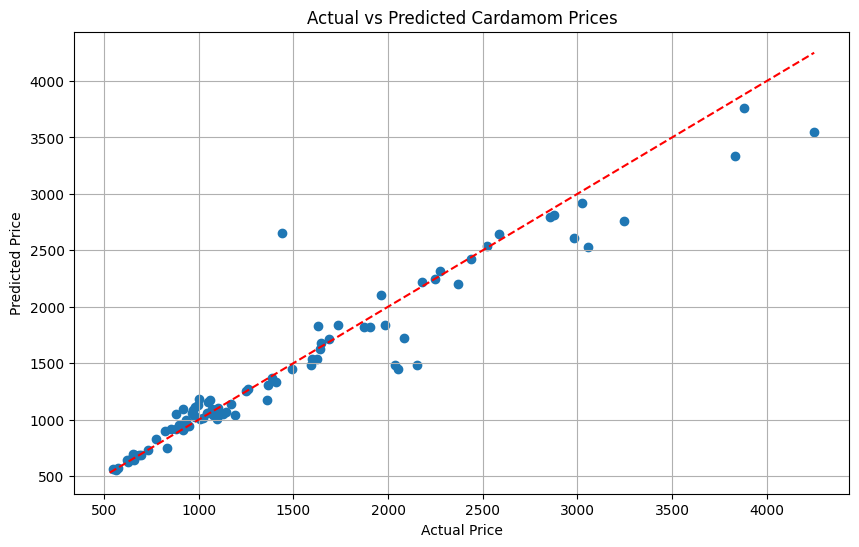

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Cardamom Prices")
plt.grid(True)
plt.show()

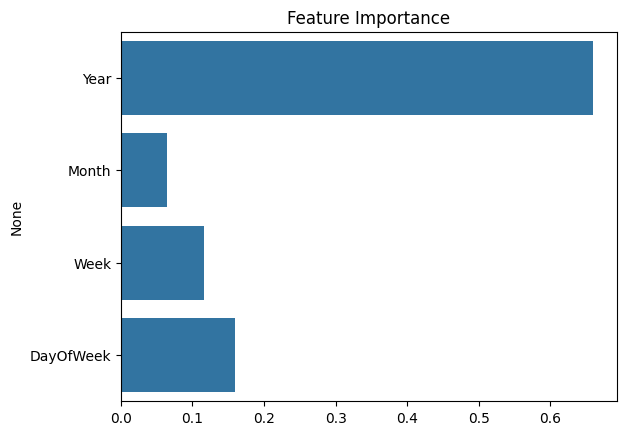

In [47]:
import seaborn as sns

features = X.columns
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
import joblib
joblib.dump(model, "cardamom_date_model.pkl")


['cardamom_date_model.pkl']

In [50]:
joblib.dump(model, "cardamom_date_model.pkl")

['cardamom_date_model.pkl']

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

In [52]:
# Load your data
data = pd.read_excel("Aditya_cardomom_company.xlsx")
data['Date of Auction'] = pd.to_datetime(data['Date of Auction'])
data.set_index('Date of Auction', inplace=True)

# Feature engineering
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Week'] = data.index.isocalendar().week
data['DayOfWeek'] = data.index.dayofweek

# Define features and target
X = data[['Year', 'Month', 'Week', 'DayOfWeek']]
y = data['Avg.Price (Rs./Kg)']

In [53]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Save it for your Streamlit app
joblib.dump(model, "cardamom_date_model.pkl")

['cardamom_date_model.pkl']

In [54]:
command to run this project
streamlit run cardamom_app_date_and_month.py

SyntaxError: invalid syntax (3018494126.py, line 1)